Imports & Load Data

In [1]:
import sys
sys.path.append("../")

from src.utils import (
    load_dataset,
    generate_missing_value_report,
    detect_outliers_zscore,
    impute_median,
    plot_time_series,
    plot_bar_grouped_means,
    plot_corr_heatmap,
    plot_pairplot,
    plot_scatter,
    plot_histograms,
    plot_bubble
)

# Load and inspect data
df = load_dataset("../data/sierraleone-bumbuna.csv")
print(df.describe())


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50%        -0.100000    

Summary Statistics & Missing Values

In [2]:
print(generate_missing_value_report(df))

          Missing  Percent
Comments   525600    100.0


Outlier Detection & Cleaning

In [3]:
print(generate_missing_value_report(df))

cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
print("Outlier counts:\n", detect_outliers_zscore(df, cols_to_check))

df_cleaned = impute_median(df, cols_to_check)

# Save cleaned data
df_cleaned.to_csv("../data/sierraleone_clean.csv", index=False)


          Missing  Percent
Comments   525600    100.0
Outlier counts:
 GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


Time Series Analysis

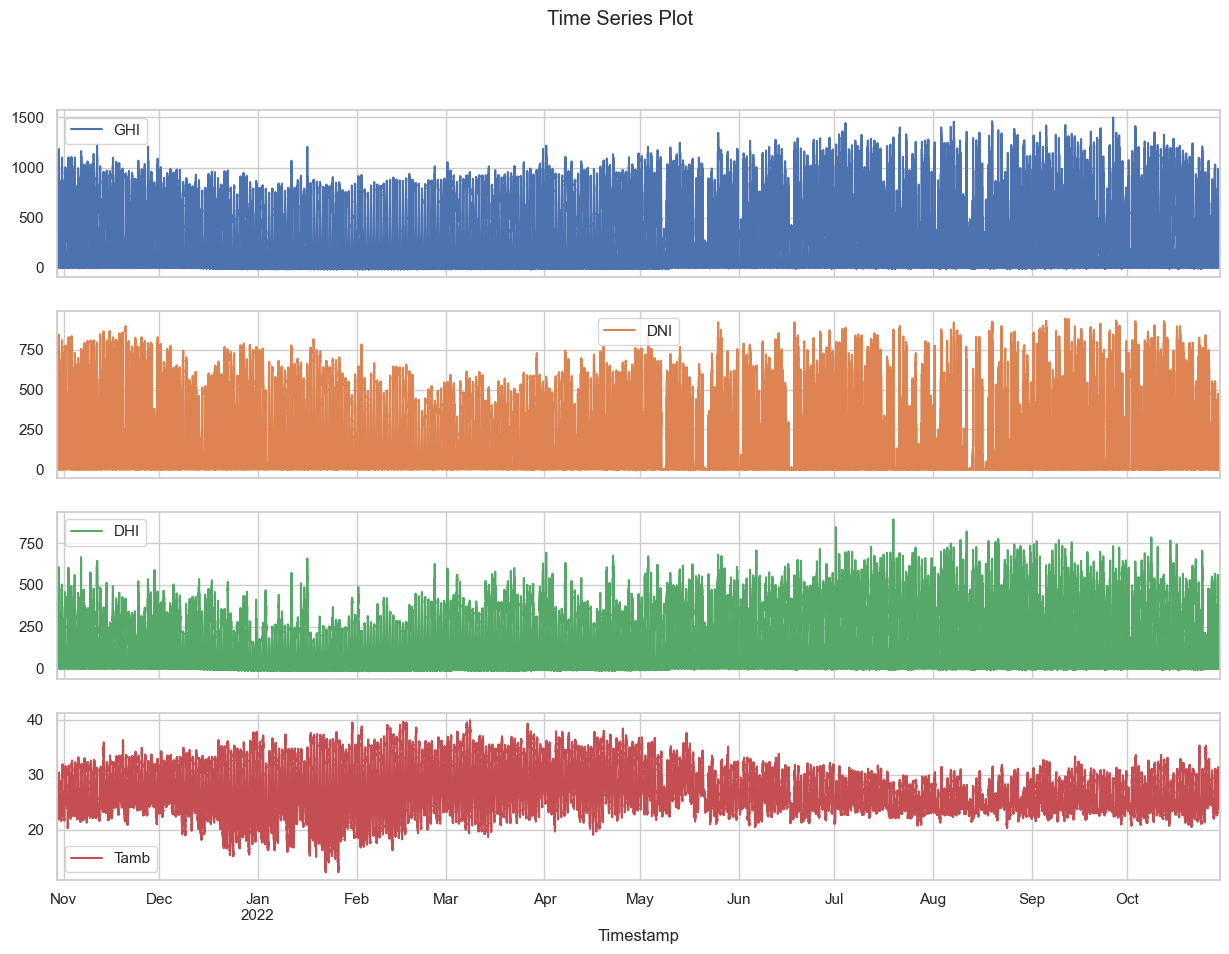

In [4]:
plot_time_series(df_cleaned, ["GHI", "DNI", "DHI", "Tamb"])

 Cleaning Impact on ModA & ModB

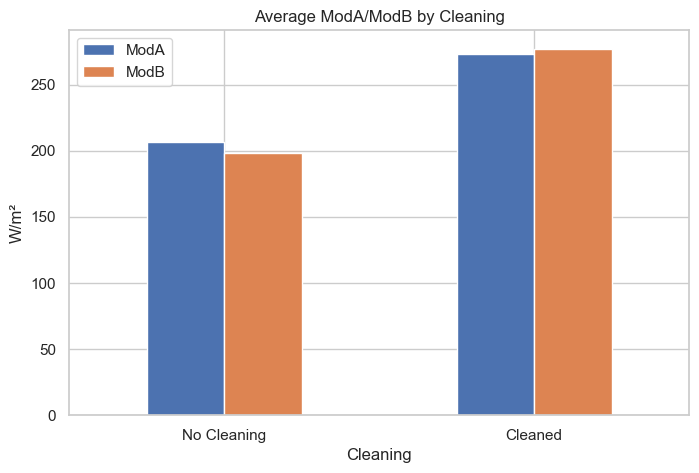

In [5]:
plot_bar_grouped_means(df_cleaned, "Cleaning", ["ModA", "ModB"], ["No Cleaning", "Cleaned"], "Average ModA/ModB by Cleaning")

Correlation & Relationships

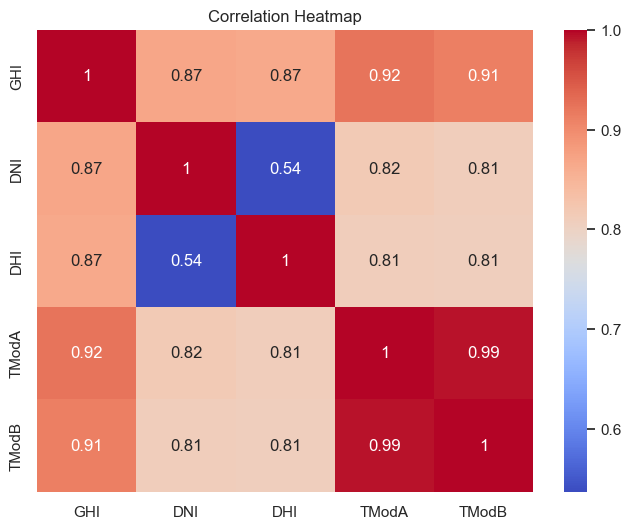

In [6]:
plot_corr_heatmap(df_cleaned, ["GHI", "DNI", "DHI", "TModA", "TModB"])

Scatter Plots

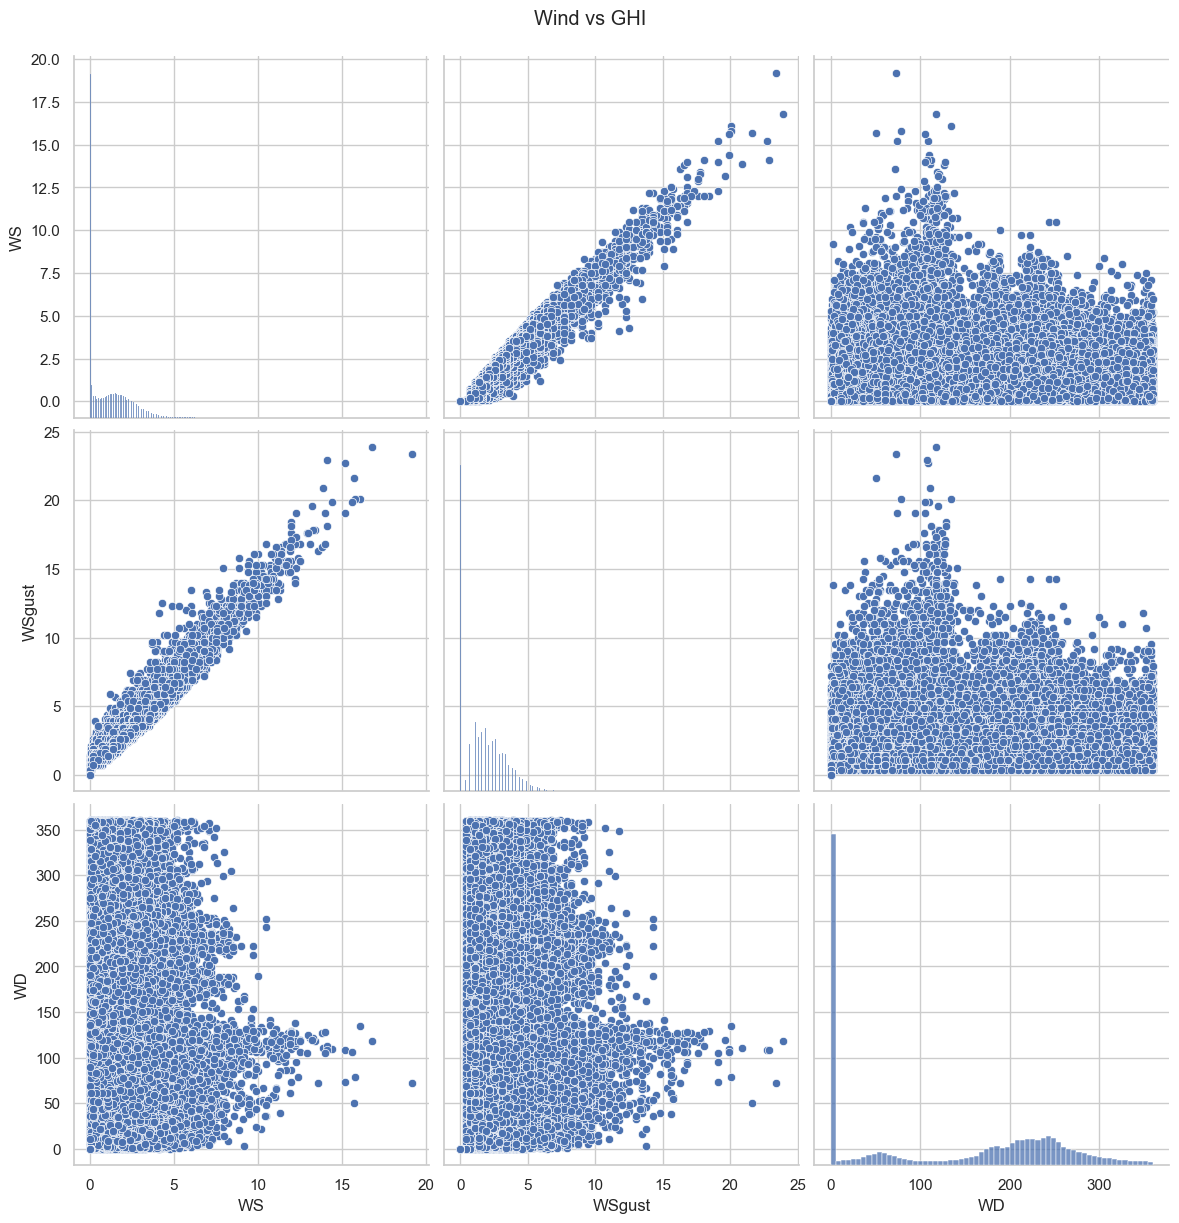

d:\10 Academy\solar-challenge-week0\notebooks\..\src\utils.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, hue=hue, palette="coolwarm")


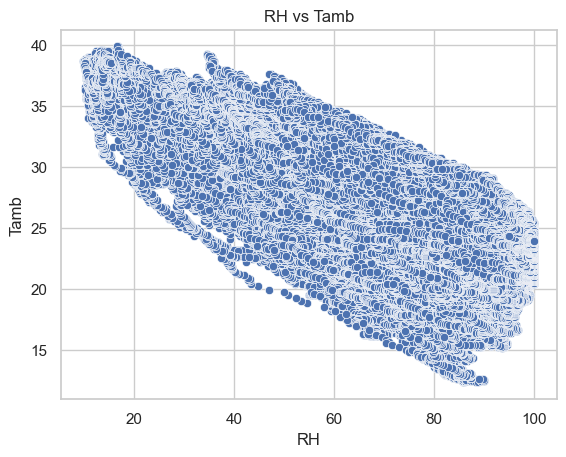

d:\10 Academy\solar-challenge-week0\notebooks\..\src\utils.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, hue=hue, palette="coolwarm")


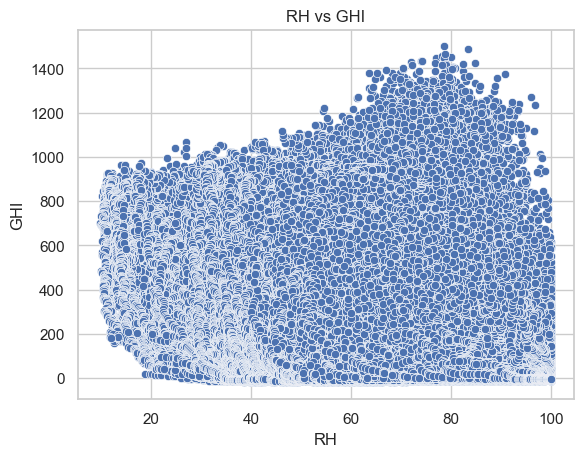

In [7]:
plot_pairplot(df_cleaned, ["WS", "WSgust", "WD"], "GHI", "Wind vs GHI")
plot_scatter(df_cleaned, "RH", "Tamb", title="RH vs Tamb")
plot_scatter(df_cleaned, "RH", "GHI", title="RH vs GHI")

Wind & Distribution

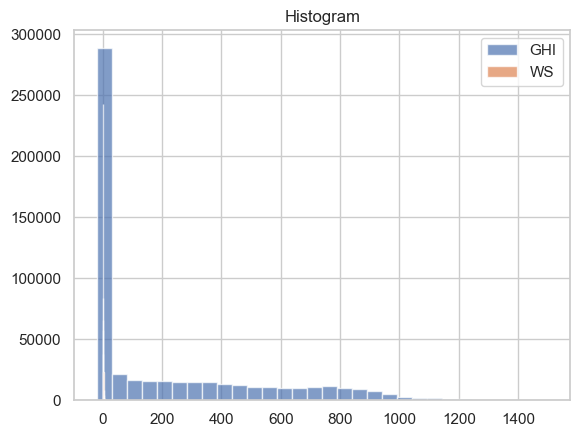

In [8]:
# Histogram of GHI and WS
plot_histograms(df_cleaned, ["GHI", "WS"])

Temperature & RH

d:\10 Academy\solar-challenge-week0\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


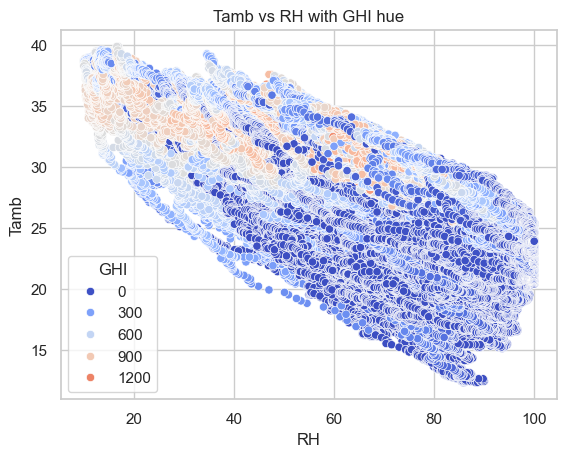

In [9]:
plot_scatter(df_cleaned, "RH", "Tamb", hue="GHI", title="Tamb vs RH with GHI hue")

Bubble Chart: GHI vs Tamb (bubble = RH)

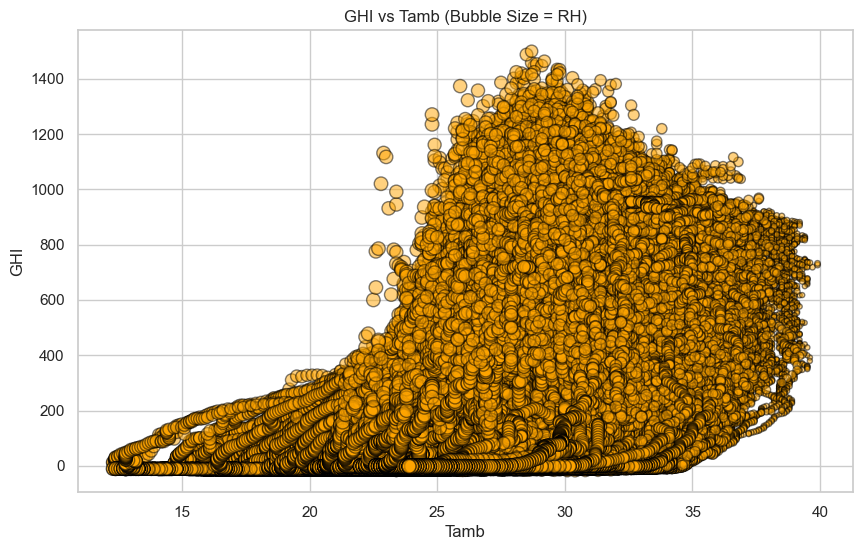

In [10]:
plot_bubble(df_cleaned, "Tamb", "GHI", "RH", title="GHI vs Tamb (Bubble Size = RH)")